---
---
**(A)Rule Based Smart Home Automation Using Random Sensor Data**

---
---


In [368]:
#importing modules
import numpy as np
import pandas as pd

#defining perception input
def perception():
    temp=(np.random.rand()-0.5)*100 #temprature between -50 and 50
    hum=np.random.rand()*10 #humidity between 0 and 10
    opt=np.random.rand()*100 #light brightness 0 and 100
    return (temp,hum,opt)
def motion():
    return np.random.choice([0,1])
#logic for automation
def decision():
    t,h,l=perception()
    m=motion()
    if m==1:
        fan="on" if t>28.0 else "off"
        ac="on" if h>3.0 else "off"
        light="on" if l<50 else "off"
    else:
        ac,fan,light="off","off","off"
    print(f"Perception := Temprature : {t} , Humidity : {h} , Light : {l} , Motion : {m}")
    print(f"Action := fan : {fan} , ac : {ac} , light : {light}\n")

#simulation loop
for _ in range(5):
    decision()


Perception := Temprature : 3.1354441950734557 , Humidity : 6.470083680133091 , Light : 54.39072422149628 , Motion : 1
Action := fan : off , ac : on , light : off

Perception := Temprature : -6.918984259758232 , Humidity : 9.977027843913541 , Light : 55.617870202481775 , Motion : 1
Action := fan : off , ac : on , light : off

Perception := Temprature : 39.12629436157555 , Humidity : 7.969756751394073 , Light : 7.422946408913633 , Motion : 0
Action := fan : off , ac : off , light : off

Perception := Temprature : -10.943035759866614 , Humidity : 4.82113278785687 , Light : 45.478992977837784 , Motion : 1
Action := fan : off , ac : on , light : on

Perception := Temprature : -33.01388865875216 , Humidity : 1.135938548691816 , Light : 60.051066637652994 , Motion : 0
Action := fan : off , ac : off , light : off



---
---
**(B)Rule Based Smart Home Automation Using Sensor Data from CSV file**

---
---


In [369]:
#reading CSV File
d1=pd.read_csv("/content/drive/MyDrive/AIOT_3rd_sem/LABS_PRACTICALS/datatest.txt")
d2=pd.read_csv("/content/drive/MyDrive/AIOT_3rd_sem/LABS_PRACTICALS/datatest2.txt")
d3=pd.read_csv("/content/drive/MyDrive/AIOT_3rd_sem/LABS_PRACTICALS/datatraining.txt")
#concating data
df=pd.DataFrame(pd.concat([d1,d2,d3], ignore_index=True))
#first three data rows
df.head(3)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.700,26.272,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.718,26.290,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.730,26.230,572.666667,769.666667,0.004765,1


In [370]:
#defining perception input
def csv_percept(i):
    temp=df.iloc[i,1]
    hum=df.iloc[i,2]
    opt=df.iloc[i,3]
    return (temp,hum,opt)
def csv_motion(i):
    return df.iloc[i,6]
#logic for automation
def csv_decision(i):
    t,h,l=csv_percept(i)
    m=csv_motion(i)
    if m==1:
        fan="on" if t>23.0 else "off"
        ac="on" if h>30.0 else "off"
        light="on" if l<400.0 else "off"
    else:
        ac,fan,light="off","off","off"
    print(f"Perception := Temprature : {t} , Humidity : {h} , Light : {l} , Motion : {m}")
    print(f"Action := fan : {fan} , ac : {ac} , light : {light}\n")
#simulation loop
for i in range(10):
    csv_decision(i)

Perception := Temprature : 23.7 , Humidity : 26.272 , Light : 585.2 , Motion : 1
Action := fan : on , ac : off , light : off

Perception := Temprature : 23.718 , Humidity : 26.29 , Light : 578.4 , Motion : 1
Action := fan : on , ac : off , light : off

Perception := Temprature : 23.73 , Humidity : 26.23 , Light : 572.666666666667 , Motion : 1
Action := fan : on , ac : off , light : off

Perception := Temprature : 23.7225 , Humidity : 26.125 , Light : 493.75 , Motion : 1
Action := fan : on , ac : off , light : off

Perception := Temprature : 23.754 , Humidity : 26.2 , Light : 488.6 , Motion : 1
Action := fan : on , ac : off , light : off

Perception := Temprature : 23.76 , Humidity : 26.26 , Light : 568.666666666667 , Motion : 1
Action := fan : on , ac : off , light : off

Perception := Temprature : 23.73 , Humidity : 26.29 , Light : 536.333333333333 , Motion : 1
Action := fan : on , ac : off , light : off

Perception := Temprature : 23.754 , Humidity : 26.29 , Light : 509.0 , Motion : 

---
---
**(C)Learning Occupancy From sensor's data and applying Rule based smart home automation**

---
---


In [371]:
#importing modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [372]:
#splitting features and target
x=np.array(df.iloc[:,1:6]).reshape(len(df),5)
y=np.array(df.iloc[:,6]).reshape(len(df),)
#splitting test-train split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [373]:
#for comparison
model_auc_comp={}
cm_comp=[]

In [374]:
#trainging logistic regression model
logR=LogisticRegression(random_state=72)
logR.fit(np.array(xtrain),np.array(ytrain))

LogisticRegression(random_state=72)

In [375]:
model_auc_comp["LogisticRegression"]=accuracy_score(logR.predict(np.array(xtest)),ytest)*100
cm_comp.append(confusion_matrix(ytest,logR.predict(np.array(xtest))))
#printing accuracy score
print("Training Accuracy (Logistic Regression): ",accuracy_score(logR.predict(np.array(xtrain)),ytrain)*100)
#printing accuracy score
print("Testing Accuracy (Logistic Regression) : ",accuracy_score(logR.predict(np.array(xtest)),ytest)*100)

Training Accuracy (Logistic Regression):  98.93604085603113
Testing Accuracy (Logistic Regression) :  98.75972762645915


In [376]:
decT=DecisionTreeClassifier(random_state=72)
decT.fit(np.array(xtrain),np.array(ytrain))

DecisionTreeClassifier(random_state=72)

In [377]:
model_auc_comp["DecisionTree"]=accuracy_score(decT.predict(np.array(xtest)),ytest)*100
cm_comp.append(confusion_matrix(ytest,decT.predict(np.array(xtest))))
#printing accuracy score
print("Training Accuracy (Decision Tree): ",accuracy_score(decT.predict(np.array(xtrain)),ytrain)*100)
#printing accuracy score
print("Testing Accuracy (Decision Tree) : ",accuracy_score(decT.predict(np.array(xtest)),ytest)*100)

Training Accuracy (Decision Tree):  100.0
Testing Accuracy (Decision Tree) :  98.9056420233463


In [378]:
ranF=RandomForestClassifier(n_estimators=100,random_state=72)
ranF.fit(np.array(xtrain),np.array(ytrain))

RandomForestClassifier(random_state=72)

In [379]:
model_auc_comp["RandomForest"]=accuracy_score(ranF.predict(np.array(xtest)),ytest)*100
cm_comp.append(confusion_matrix(ytest,ranF.predict(np.array(xtest))))
#printing accuracy score
print("Training Accuracy (Random Forest): ",accuracy_score(ranF.predict(np.array(xtrain)),ytrain)*100)
#printing accuracy score
print("Testing Accuracy (Random Forest) : ",accuracy_score(ranF.predict(np.array(xtest)),ytest)*100)

Training Accuracy (Random Forest):  100.0
Testing Accuracy (Random Forest) :  99.19747081712063


In [380]:
svmC=svm.SVC(random_state=72)
svmC.fit(np.array(xtrain),np.array(ytrain))

SVC(random_state=72)

In [381]:
model_auc_comp["SuppourtVector"]=accuracy_score(svmC.predict(np.array(xtest)),ytest)*100
cm_comp.append(confusion_matrix(ytest,svmC.predict(np.array(xtest))))
#printing accuracy score
print("Training Accuracy (Suppourt Vector): ",accuracy_score(svmC.predict(np.array(xtrain)),ytrain)*100)
#printing accuracy score
print("Testing Accuracy (Suppourt Vector) : ",accuracy_score(svmC.predict(np.array(xtest)),ytest)*100)

Training Accuracy (Suppourt Vector):  98.9238813229572
Testing Accuracy (Suppourt Vector) :  98.784046692607


In [382]:
scaler=StandardScaler()
xtrains=scaler.fit_transform(xtrain)
xtests=scaler.transform(xtest)

In [383]:
knnC=KNeighborsClassifier(n_neighbors=5)
knnC.fit(np.array(xtrains),np.array(ytrain))

KNeighborsClassifier()

In [384]:
model_auc_comp["KNN"]=accuracy_score(knnC.predict(np.array(xtests)),ytest)*100
cm_comp.append(confusion_matrix(ytest,logR.predict(np.array(xtests))))
#printing accuracy score
print("Training Accuracy (KNN): ",accuracy_score(knnC.predict(np.array(xtrains)),ytrain)*100)
#printing accuracy score
print("Testing Accuracy (KNN) : ",accuracy_score(knnC.predict(np.array(xtests)),ytest)*100)

Training Accuracy (KNN):  99.51969844357976
Testing Accuracy (KNN) :  99.00291828793775


In [385]:
naiB=GaussianNB()
naiB.fit(np.array(xtrain),np.array(ytrain))

GaussianNB()

In [386]:
model_auc_comp["NaiveBayes"]=accuracy_score(naiB.predict(np.array(xtest)),ytest)*100
cm_comp.append(confusion_matrix(ytest,naiB.predict(np.array(xtest))))
#printing accuracy score
print("Training Accuracy (Naive Bayes): ",accuracy_score(naiB.predict(np.array(xtrain)),ytrain)*100)
#printing accuracy score
print("Testing Accuracy (Naive Bayes) : ",accuracy_score(naiB.predict(np.array(xtest)),ytest)*100)

Training Accuracy (Naive Bayes):  96.78988326848248
Testing Accuracy (Naive Bayes) :  96.03599221789884


In [387]:
#finding best classifier
clf=""
max_auc=0.0
for k in model_auc_comp.keys():
    if model_auc_comp[k]>max_auc:
        max_auc=model_auc_comp[k]
        clf=k
print("Best classifier = ",clf)

Best classifier =  RandomForest


In [388]:
#predicting on test data
ypred=ranF.predict(np.array(xtest))
ypred.shape

(4112,)

In [389]:
#automation based on predicted occupancy from sensors input


In [390]:
#defining perception input
def csv_predict_percept(i):
    temp=xtest[i,1]
    hum=xtest[i,2]
    opt=xtest[i,3]
    return (temp,hum,opt)

In [391]:
def csv_predict_motion(i):
    return ranF.predict(xtest[i].reshape(1, -1))[0]

In [392]:
#logic for automation
def csv_predict_decision(i):
    t,h,l=csv_predict_percept(i)
    m=csv_predict_motion(i)
    if m==1:
        fan="on" if t>23.0 else "off"
        ac="on" if h>30.0 else "off"
        light="on" if l<400.0 else "off"
    else:
        ac,fan,light="off","off","off"
    print(f"Perception := Temprature : {t} , Humidity : {h} , Light : {l} , Motion : {m}")
    print(f"Action := fan : {fan} , ac : {ac} , light : {light}\n")

In [393]:
#simulation loop
for i in range(10):
    csv_predict_decision(i)

Perception := Temprature : 30.6333333333333 , Humidity : 6.0 , Light : 430.0 , Motion : 0
Action := fan : off , ac : off , light : off

Perception := Temprature : 31.29 , Humidity : 0.0 , Light : 511.0 , Motion : 0
Action := fan : off , ac : off , light : off

Perception := Temprature : 30.745 , Humidity : 0.0 , Light : 1119.5 , Motion : 0
Action := fan : off , ac : off , light : off

Perception := Temprature : 27.0 , Humidity : 24.0 , Light : 423.333333333333 , Motion : 0
Action := fan : off , ac : off , light : off

Perception := Temprature : 24.1 , Humidity : 0.0 , Light : 617.0 , Motion : 0
Action := fan : off , ac : off , light : off

Perception := Temprature : 28.2 , Humidity : 0.0 , Light : 852.25 , Motion : 0
Action := fan : off , ac : off , light : off

Perception := Temprature : 33.0 , Humidity : 0.0 , Light : 446.333333333333 , Motion : 0
Action := fan : off , ac : off , light : off

Perception := Temprature : 19.5333333333333 , Humidity : 0.0 , Light : 479.333333333333 , Mo

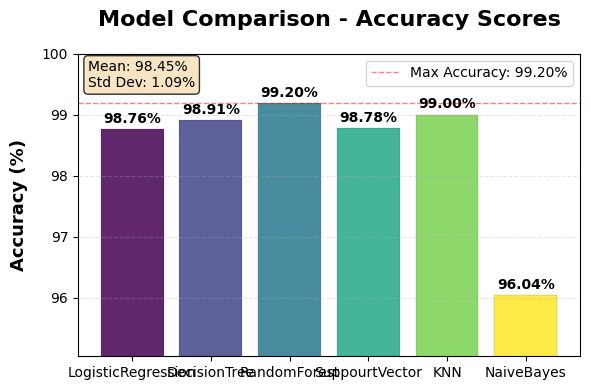

In [398]:
import matplotlib.pyplot as plt
import numpy as np

models = list(model_auc_comp.keys())
auc_scores = list(model_auc_comp.values())
max_score, colors = max(auc_scores), plt.cm.viridis(np.linspace(0, 1, len(models)))

plt.figure(figsize=(9,6))
bars = plt.bar(models, auc_scores, color=colors, edgecolor='black', linewidth=0.1, alpha=0.85)

for bar, score in zip(bars, auc_scores):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.05, f'{score:.2f}%',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Model Comparison - Accuracy Scores', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Accuracy (%)', fontsize=13, fontweight='semibold', labelpad=10)
plt.grid(True, axis='y', alpha=0.3, linestyle='--')
plt.ylim(min(auc_scores)-1, 100)
plt.axhline(y=max_score, color='red', linestyle='--', alpha=0.5, linewidth=1,
            label=f'Max Accuracy: {max_score:.2f}%')
plt.legend(loc='upper right', fontsize=10)

plt.text(0.02, 0.98, f'Mean: {np.mean(auc_scores):.2f}%\nStd Dev: {np.std(auc_scores):.2f}%',
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

---